In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [3]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

In [4]:
lr = 0.1      
epochs = 1000
n_input = 2
n_hidden = 2
n_output = 1

In [5]:
W1 = np.random.rand(n_input, n_hidden)
b1 = np.random.rand(1, n_hidden)
W2 = np.random.rand(n_hidden, n_output)
b2 = np.random.rand(1, n_output)

In [6]:
losses = []

for epoch in range(epochs):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = sigmoid(z2)

    loss = np.mean((Y - y_pred) ** 2)
    losses.append(loss)

    d_loss = (Y - y_pred)
    d_pred = d_loss * sigmoid_derivative(y_pred)

    dW2 = np.dot(a1.T, d_pred)
    db2 = np.sum(d_pred, axis=0, keepdims=True)

    d_hidden = np.dot(d_pred, W2.T) * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, d_hidden)
    db1 = np.sum(d_hidden, axis=0, keepdims=True)

    W1 += lr * dW1
    b1 += lr * db1
    W2 += lr * dW2
    b2 += lr * db2

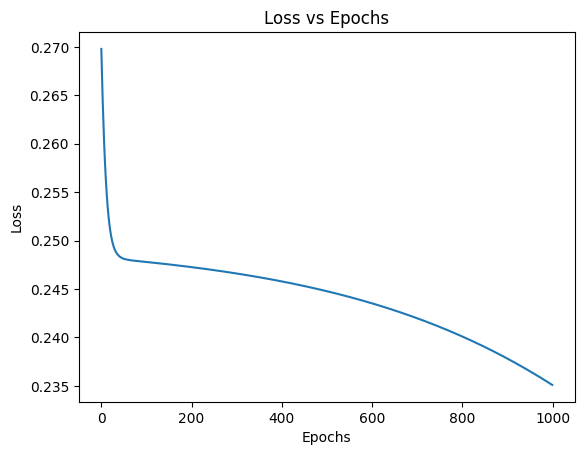

In [7]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()

In [8]:
test_input = np.array([[1,1]])
z1 = np.dot(test_input, W1) + b1
a1 = sigmoid(z1)
z2 = np.dot(a1, W2) + b2
test_output = sigmoid(z2)

print("Test Input:", test_input)
print("Predicted Output:", test_output)

Test Input: [[1 1]]
Predicted Output: [[0.55014813]]
